In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer, StandardScaler
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Kaggle/Data set/Card Dataset for Clustering/CC GENERAL.csv')

In [6]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [15]:
print(df.isna().sum())

print(df.isna().sum()/df.shape[0])

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64
CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.0000

In [19]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(value = df['MINIMUM_PAYMENTS'].mean())
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(value= df['CREDIT_LIMIT'].mean())

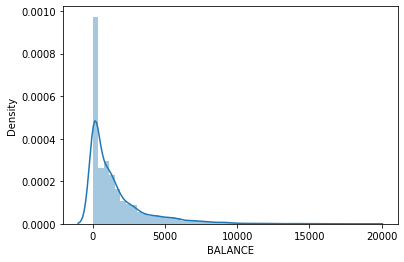

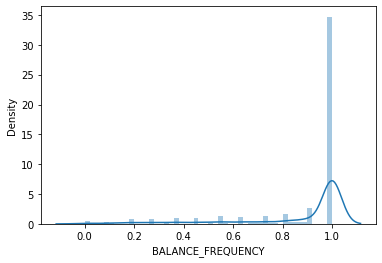

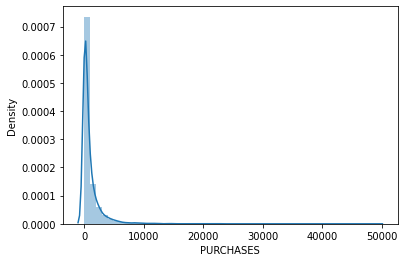

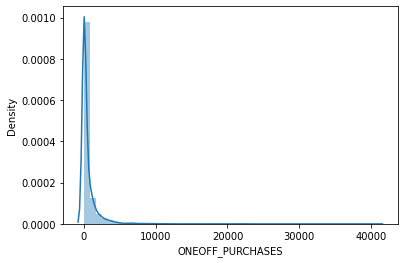

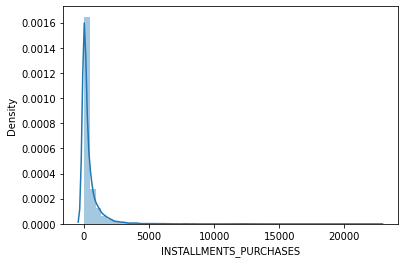

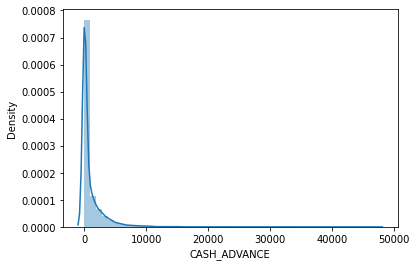

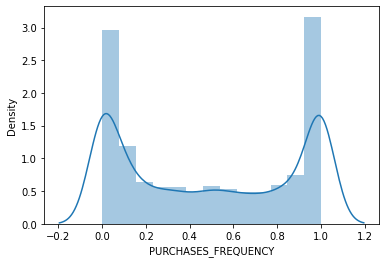

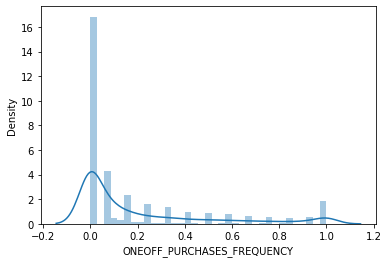

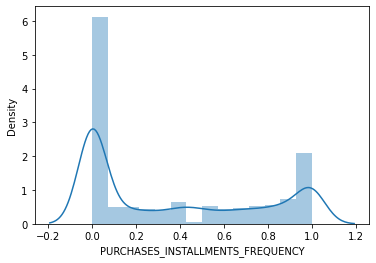

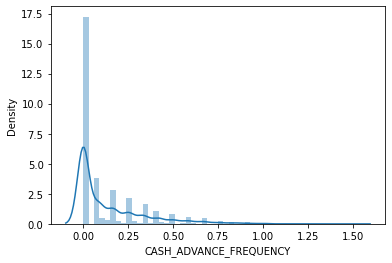

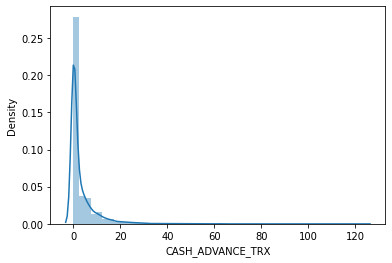

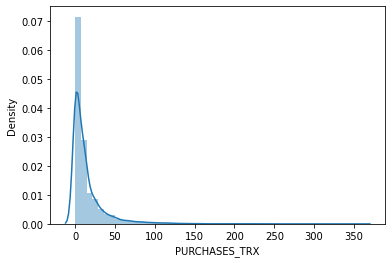

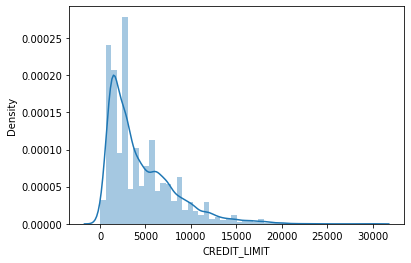

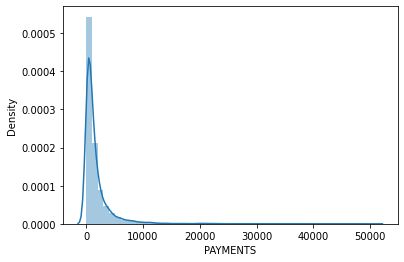

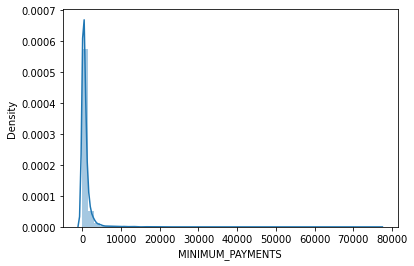

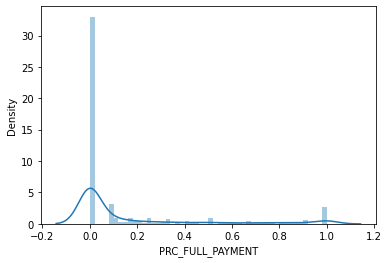

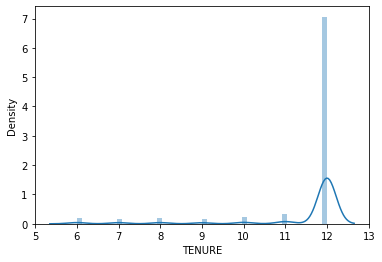

In [32]:
# check for skewness

for i in df.select_dtypes(['int', 'float64']).columns:
  sns.distplot(df[i])
  plt.show()

In [ ]:
# sing power transformer to deal with the outlier

In [35]:
x = df.drop('CUST_ID', axis = 1).copy()

pt = PowerTransformer()

x_kmean = pt.fit_transform(x)
x_kmean = pd.DataFrame(x_kmean, columns=x.columns)

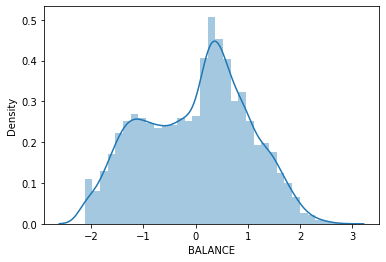

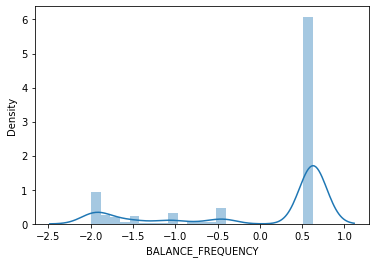

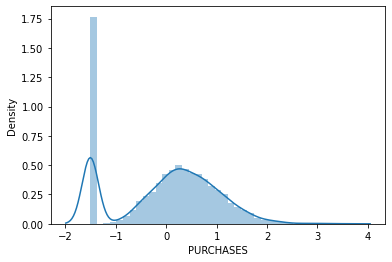

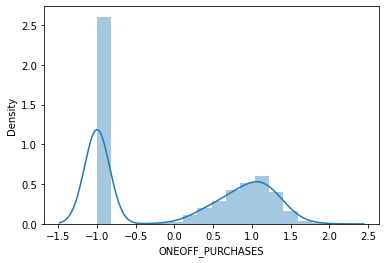

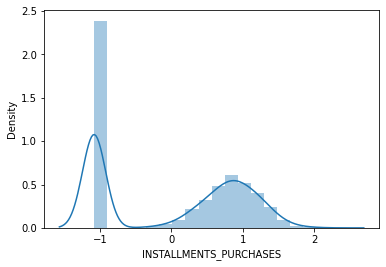

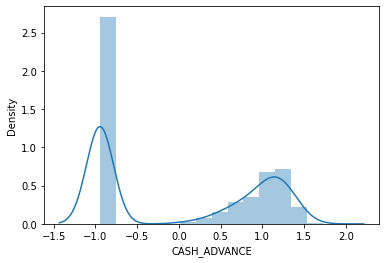

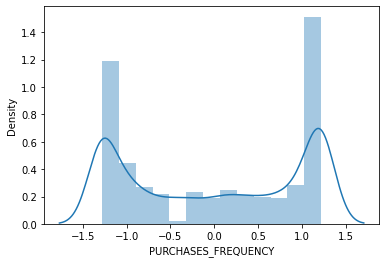

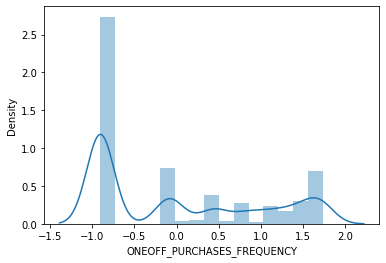

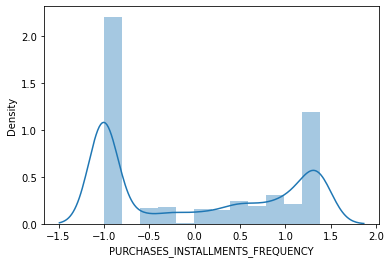

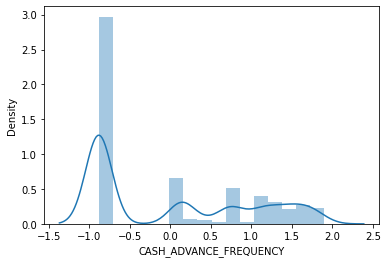

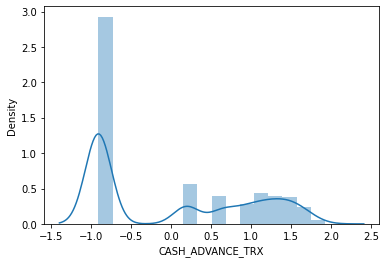

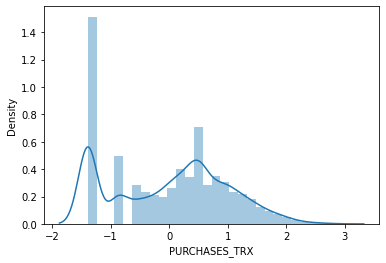

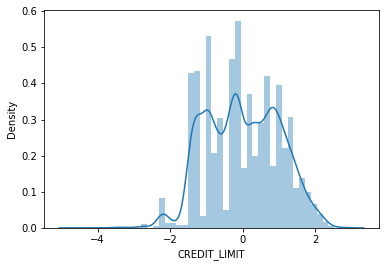

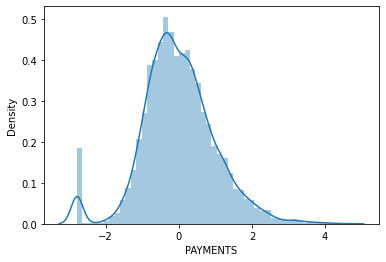

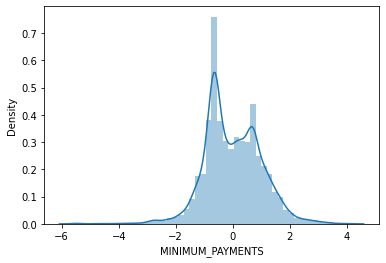

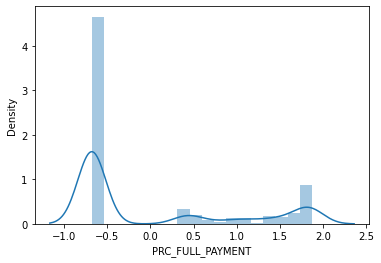

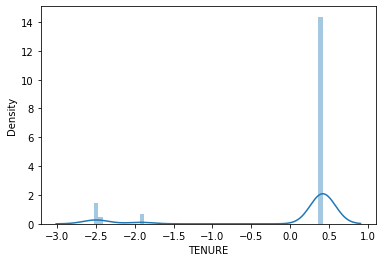

In [42]:
for i in x_kmean.select_dtypes(['int','float64']).columns:
  sns.distplot(x_kmean[i])
  plt.show()

In [40]:
x_kmean

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.238103,-1.079348,-0.368050,-1.000488,0.383704,-0.944538,-0.766859,-0.903315,-0.606642,-0.883204,-0.905801,-0.573664,-1.425364,-0.983876,-0.849237,-0.677889,0.422252
1,1.051961,-0.424939,-1.505149,-1.000488,-1.085422,1.399909,-1.278866,-0.903315,-1.004445,1.124423,1.044342,-1.387624,0.924151,1.285321,0.877661,1.235021,0.422252
2,0.860616,0.628612,0.521657,1.065381,-1.085422,-0.944538,1.218860,1.732554,-1.004445,-0.883204,-0.905801,0.494757,1.012134,-0.291722,0.435065,-0.677889,0.422252
3,0.570542,-1.710851,0.875823,1.229556,-1.085422,0.680451,-1.015926,-0.092230,-1.004445,0.136071,0.194580,-0.872718,1.012134,-2.782085,0.700539,-0.677889,0.422252
4,0.111925,0.628612,-0.904786,-0.019902,-1.085422,-0.944538,-1.015926,-0.092230,-1.004445,-0.883204,-0.905801,-0.872718,-1.215737,-0.231669,-0.361555,-0.677889,0.422252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-1.351366,0.628612,0.066579,-1.000488,0.748736,-0.944538,1.218860,-0.903315,1.183098,-0.883204,-0.905801,0.046192,-1.425364,-0.708925,-1.778788,1.731651,-2.526612
8946,-1.465213,0.628612,0.079480,-1.000488,0.758643,-0.944538,1.218860,-0.903315,1.183098,-0.883204,-0.905801,0.046192,-1.425364,-0.807239,0.700539,-0.677889,-2.526612
8947,-1.409349,-0.991324,-0.216300,-1.000488,0.518629,-0.944538,0.876464,-0.903315,0.943466,-0.883204,-0.905801,-0.066072,-1.425364,-1.437791,-1.312930,1.328455,-2.526612
8948,-1.558537,-0.991324,-1.505149,-1.000488,-1.085422,0.237936,-1.278866,-0.903315,-1.004445,0.745869,0.635829,-1.387624,-2.203212,-1.626657,-1.661075,1.328455,-2.526612


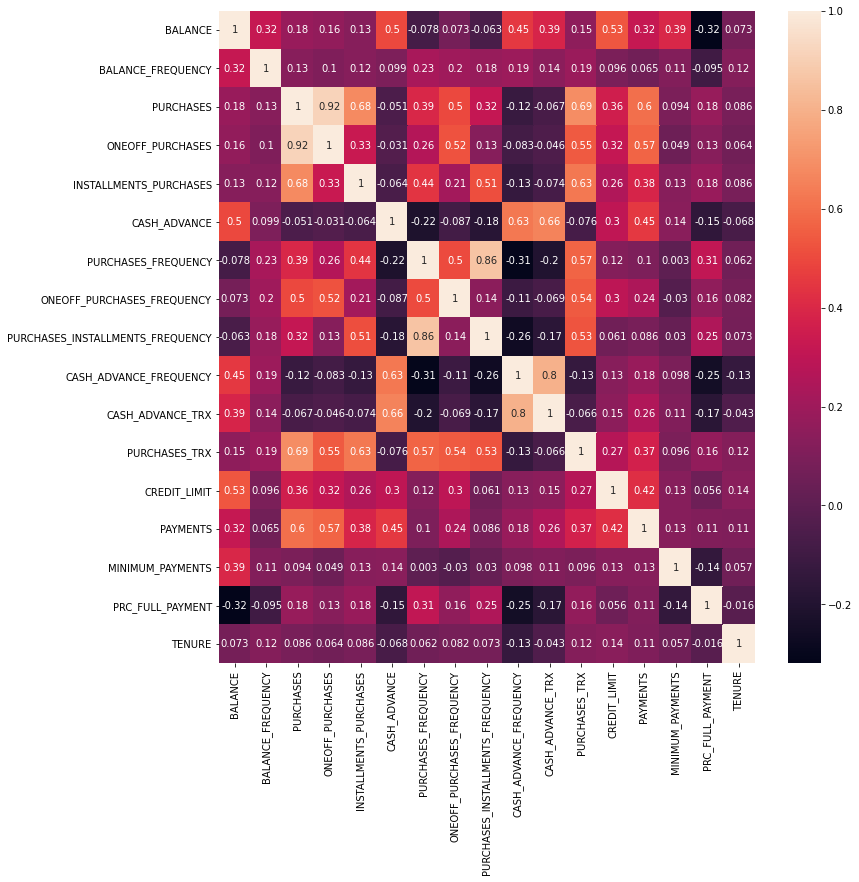

In [46]:
plt.figure(figsize=(12,12))
sns.heatmap(data = df.corr(),
            annot=True)

As we find that data has mulitcollinearity we can deal with this using PCA. it Uses the information content that is delveloped by the two independant variables that is developed coherently.we take the independant variables and standardize the data.we then capture the information between the independant variables x1 and x2 using covariance matrix.(Note-This information would not have been captured if we had passed x as just an independant variable).Now we apply eigen funtion or decomposition,We get eigen vectors and eigen values. Eigen vector is nothing but the new axes. (The new axes is the orthogonal axes after standardazing and capturing the covariance matrix) We get 2 eigen vectors for x1 and x2 which are the new components.The variance captured by one vector is eigen value.Here we are passing the 95% to keep the number of components which captures 95%variance.

In [48]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(x_kmean)

## K-means clustering

In [54]:
from sklearn.cluster import KMeans

cluster_range = np.arange(1, 16)
cluster_error = []

for i in cluster_range:
  k = KMeans(n_clusters=i, n_init=14)
  k.fit(x_kmean)
  cluster_error.append(k.inertia_)

k_means = [KMeans(n_clusters=i,random_state=4).fit(x_kmean) for i in range(1,16)]

In [55]:
pd.DataFrame({'No of Clusters':cluster_range,'Cluster Errors':cluster_error})

,No of Clusters,Cluster Errors
0,1,152150.000000
1,2,110531.549248
2,3,91970.467213
3,4,81741.441112
4,5,73220.725459
5,6,69063.945945
6,7,65315.398315
7,8,62260.338142
8,9,59322.499804
9,10,56807.587186


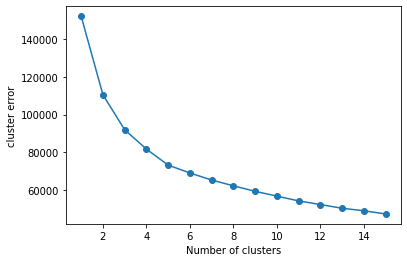

In [57]:
plt.xlabel('Number of clusters')
plt.ylabel('cluster error')
plt.plot(cluster_range, cluster_error, marker = 'o')

In [64]:
kmeans = KMeans(n_clusters=3, random_state=23)
kmeans.fit(X_reduced)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=23, tol=0.0001, verbose=0)

In [65]:
df['label'] = kmeans.labels_

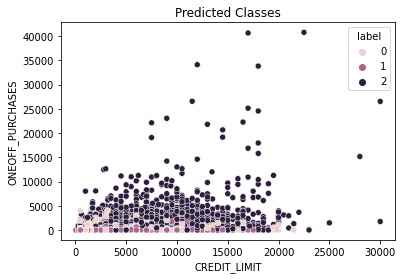

In [67]:
plt.title('Predicted Classes')
sns.scatterplot(data=df,x='CREDIT_LIMIT', y='ONEOFF_PURCHASES', hue='label')
plt.show()

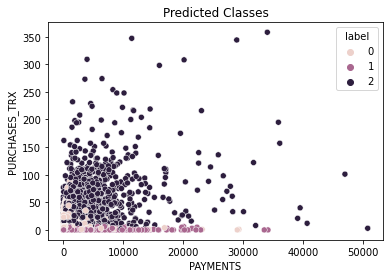

In [68]:
plt.title('Predicted Classes')
sns.scatterplot(data=df,x='PAYMENTS', y='PURCHASES_TRX', hue='label')
plt.show() 

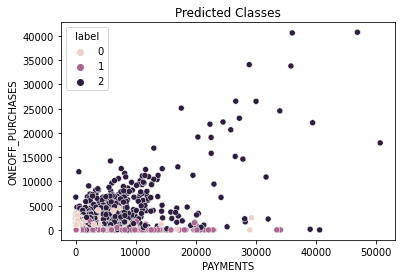

In [69]:
plt.title('Predicted Classes')
sns.scatterplot(data=df,x='PAYMENTS', y='ONEOFF_PURCHASES', hue='label')
plt.show()

Agglomerative clustering

In [70]:
df.drop('CUST_ID',axis=1,inplace=True)

In [71]:
pt = PowerTransformer()

x_ag = pt.fit_transform(df)
x_ag = pd.DataFrame(x_ag,columns=df.columns)

In [72]:
pca = PCA(n_components=0.95)
X_reducedagg = pca.fit_transform(x_ag)

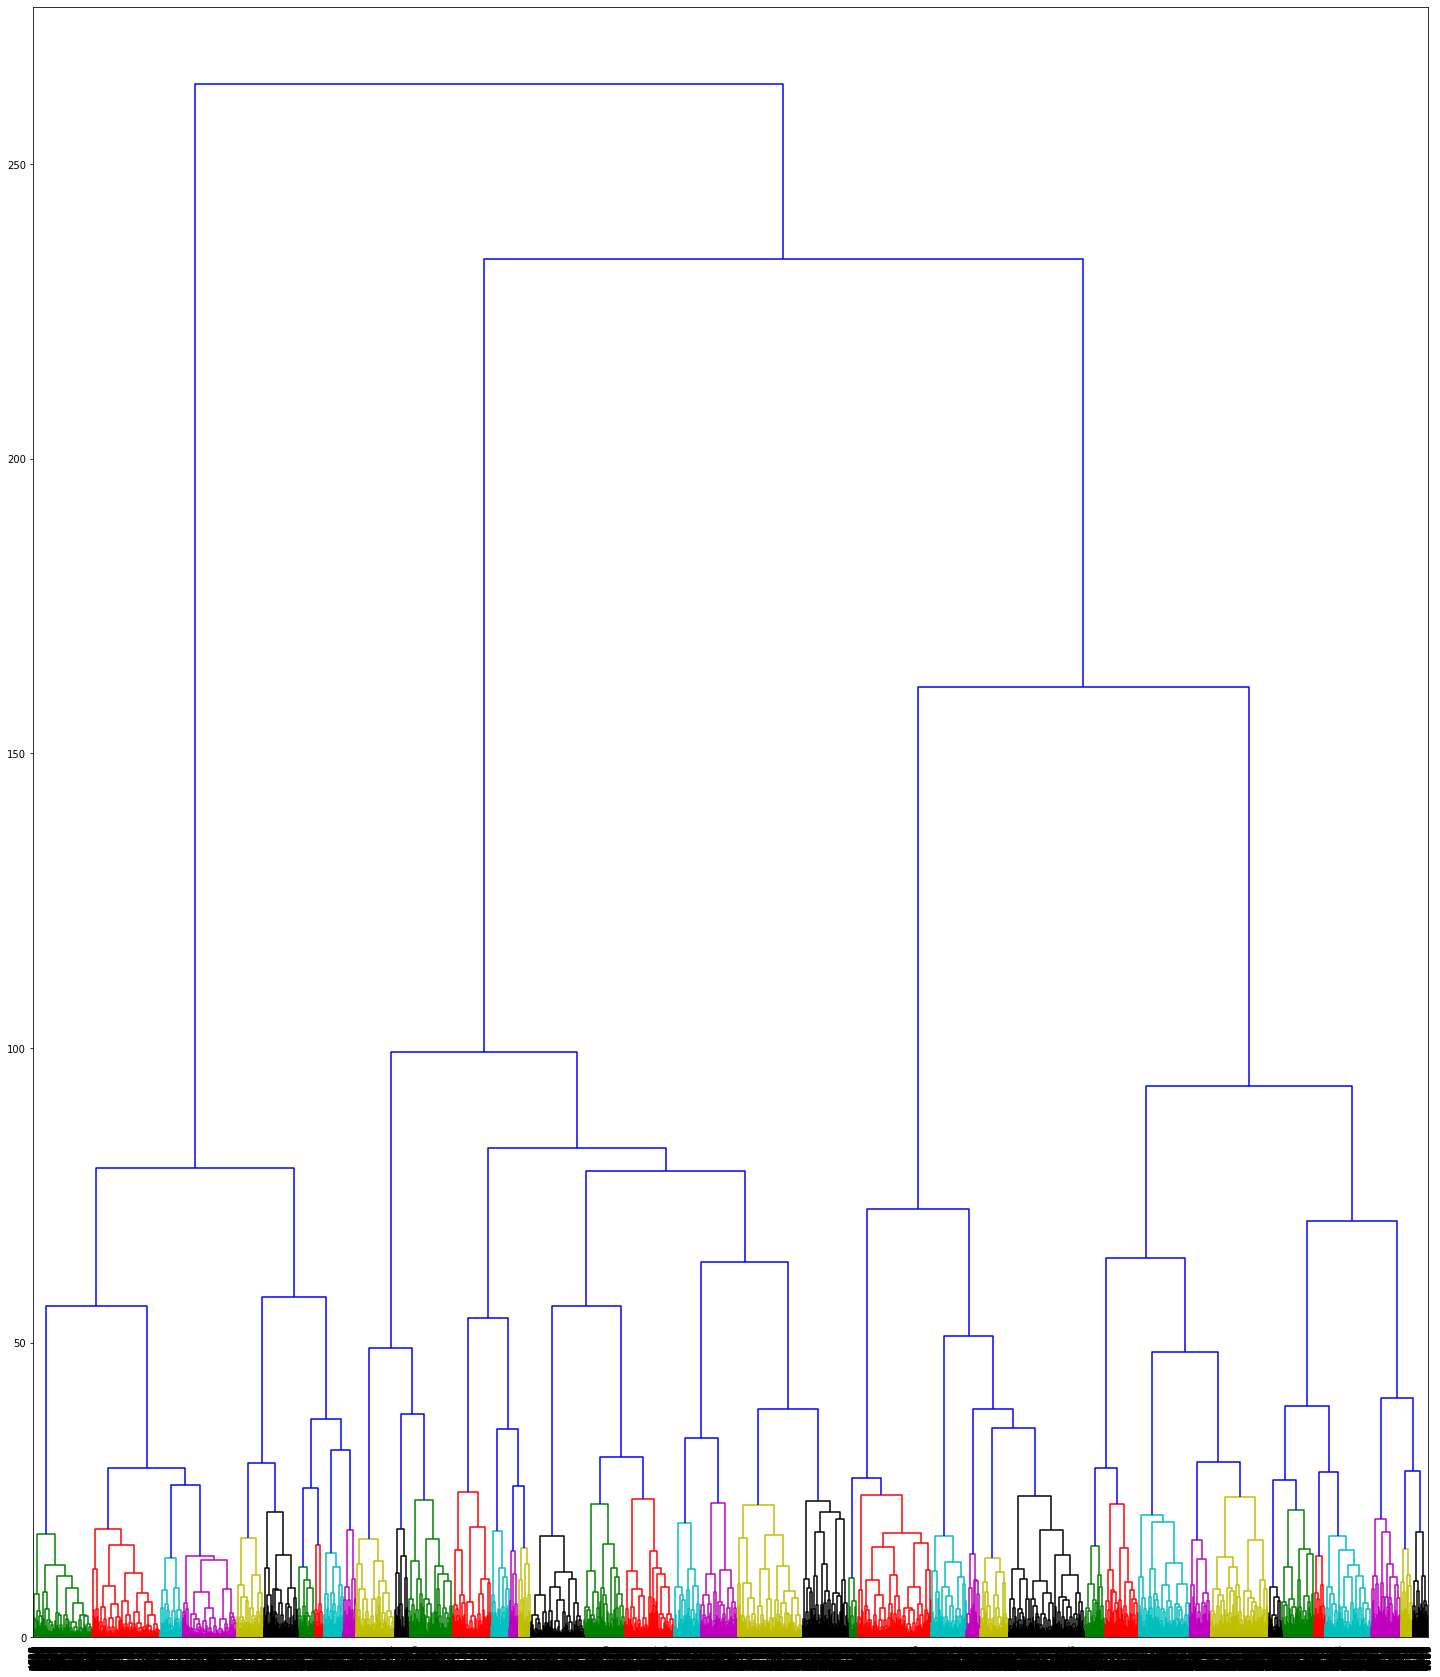

In [73]:
from scipy.cluster.hierarchy import dendrogram,linkage
plt.figure(figsize=(25,30))
merg=linkage(X_reducedagg,method='ward')
dendrogram(merg,p=30,leaf_rotation=90,color_threshold=25,leaf_font_size=10,truncate_mode='level')
plt.show()

In [74]:
from sklearn.cluster import AgglomerativeClustering
hie_clus=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [75]:
hie_clus.fit(X_reducedagg)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [76]:
df['class'] = hie_clus.labels_

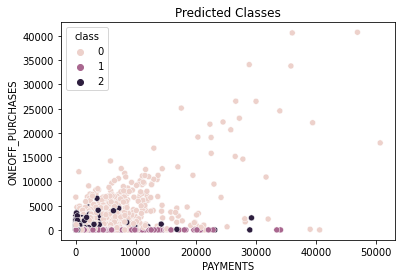

In [77]:
plt.title('Predicted Classes')
sns.scatterplot(data=df,x='PAYMENTS', y='ONEOFF_PURCHASES', hue='class')
plt.show()

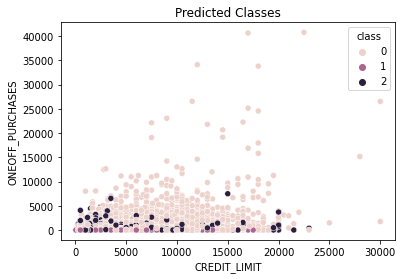

In [78]:
plt.title('Predicted Classes')
sns.scatterplot(data=df,x='CREDIT_LIMIT', y='ONEOFF_PURCHASES', hue='class')
plt.show()

In [79]:
#agglomerative clustering  
df.groupby('class').size()

class
0    3723
1    2070
2    3157
dtype: int64

In [80]:
#kmeans clustering
df.groupby('label').size()

label
0    3147
1    2888
2    2915
dtype: int64